# Анализ датасеста по сессиям пользователей мобильного приложения Gett и действиям в приложении (значимые этапы воронки) при прохождении курса "A/B-тестирование:практическое руководство".

In [128]:
#устанавливаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
#Загружаем файл csv с данными
df = pd.read_csv('new_dataframe.csv', sep=',')

In [130]:
#смотрим основную информацию
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101500 entries, 0 to 101499
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         101500 non-null  int64  
 1   user_id            101500 non-null  int64  
 2   hour               101500 non-null  int64  
 3   os                 101500 non-null  object 
 4   order_class        101500 non-null  object 
 5   surge              91431 non-null   object 
 6   app_opened         101500 non-null  int64  
 7   price_seen         101500 non-null  int64  
 8   order_made         101500 non-null  int64  
 9   ride_completed     101500 non-null  int64  
 10  user_cancelled     101500 non-null  int64  
 11  city_center_order  101500 non-null  int64  
 12  distance           91431 non-null   float64
 13  age                101500 non-null  int64  
 14  rfm                101500 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 1

In [131]:
df.describe()

,Unnamed: 0,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age
count,101500.000000,101500.000000,101500.000000,101500.0,101500.000000,101500.000000,101500.000000,101500.000000,101500.000000,91431.000000,101500.000000
mean,50749.500000,549874.802207,11.481429,1.0,0.900798,0.731389,0.620365,0.111025,0.571675,5.371152,25.906384
std,29300.670499,258600.104176,6.917522,0.0,0.298934,0.443239,0.485299,0.314164,0.494838,4.118531,7.838328
min,0.000000,100093.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010946,18.000000
25%,25374.750000,328223.000000,5.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,2.438335,20.000000
50%,50749.500000,548827.000000,11.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,4.279565,24.000000
75%,76124.250000,773051.000000,17.000000,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,7.129814,29.000000
max,101499.000000,999978.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,40.268966,69.000000


* средний возраст пользователей - 25,9 лет
* минимальный возраст - 18
* максимальный возраст - 69
* средняя дистанция - 5,37
* минимальная дистанция - 0,01
* максимальная дистанция - 40,27


In [132]:
df.head(50)

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low
5,5,139455,5,Android,comfort,NaN,1,0,0,0,0,1,NaN,24,high
6,6,416988,0,iOS,comfort,no surge,1,1,0,0,0,1,7.535725,24,high
7,7,682337,2,Android,comfort,no surge,1,1,1,1,0,1,9.055344,21,low
8,8,931492,20,iOS,economy,NaN,1,0,0,0,0,0,NaN,25,low
9,9,662775,17,Android,comfort,surge,1,1,1,1,0,1,4.828326,36,low


In [133]:
#Пропуски в данных (кол-во)
pd.isna(df).sum()

Unnamed: 0               0
user_id                  0
hour                     0
os                       0
order_class              0
surge                10069
app_opened               0
price_seen               0
order_made               0
ride_completed           0
user_cancelled           0
city_center_order        0
distance             10069
age                      0
rfm                      0
dtype: int64

Из 101500 сессий 101500-10069=91431 пришлись на вызов такси.

In [134]:
#Количество уникальных пользователей
df.user_id.nunique()

24224

In [135]:
from pandas.tseries.frequencies import unique
#Сводная таблица: кол-во уникальных пользователей по классу
df_order_class_pie = pd.pivot_table(df, index="order_class", values="user_id", aggfunc='nunique', margins=False).sort_values(by='user_id', ascending=False)
df_order_class_pie

,user_id
order_class,
economy,21020
comfort,20230
business,9514


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7fd96937c8d0>,
 [Text(0.29334919324260017, 1.06016331327957, 'economy'),
  Text(-0.8327171218197148, -0.7187365268499234, 'comfort'),
  Text(0.9147772668776171, -0.6108866932614568, 'business')],
 [Text(0.16000865085960006, 0.5782708981524927, '41.4%'),
  Text(-0.4542093391743898, -0.39203810555450364, '39.9%'),
  Text(0.49896941829688196, -0.3332109235971582, '18.7%')])

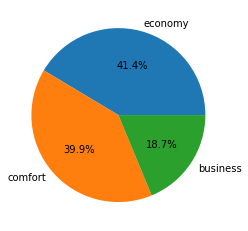

In [136]:
#Круговая диаграмма по классам пользователей
plt.pie(df_order_class_pie, labels=df_order_class_pie.index, autopct="%1.1f%%")

Приблизительно равное количество пользователей по классам эконом и комфорт.

In [137]:
#Сводная таблица: кол-во уникальных пользователей по rfm
df_rfm_pie = pd.pivot_table(df, index="rfm", values="user_id", aggfunc='nunique', margins=False).sort_values(by='user_id', ascending=False)
df_rfm_pie

,user_id
rfm,
low,12789
high,9599
medium,1836


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7fd96924a7d0>,
 [Text(-0.0964555392860084, 1.0957628981403986, 'low'),
  Text(-0.16471899328794098, -1.0875971925534782, 'high'),
  Text(1.0689641688302791, -0.25945251156423754, 'medium')],
 [Text(-0.05261211233782276, 0.5976888535311264, '52.8%'),
  Text(-0.08984672361160417, -0.5932348323018971, '39.6%'),
  Text(0.5830713648165158, -0.14151955176231137, '7.6%')])

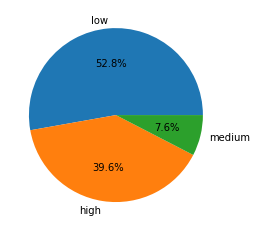

In [138]:
#Круговая диаграмма по пользователям RFM
plt.pie(df_rfm_pie, labels=df_rfm_pie.index, autopct="%1.1f%%")

Более половины всех пользователей (52,8%) относятся к сегменту "low".

In [139]:
#Сводная таблица: кол-во уникальных пользователей по os
df_os_pie = pd.pivot_table(df, index="os", values="user_id", aggfunc='nunique', margins=False)
df_os_pie.sort_values(by='user_id', ascending=False)

,user_id
os,
Android,22154
iOS,20594


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7fd969221590>,
 [Text(-0.06302075341367239, 1.0981932364748808, 'Android'),
  Text(0.06302075341367275, -1.0981932364748808, 'iOS')],
 [Text(-0.03437495640745766, 0.5990144926226622, '51.8%'),
  Text(0.03437495640745786, -0.5990144926226622, '48.2%')])

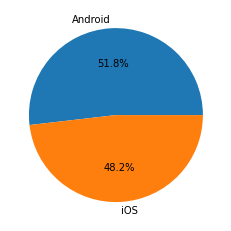

In [140]:
#Круговая диаграмма по ОС пользователей
plt.pie(df_os_pie, labels=df_os_pie.index, autopct="%1.1f%%")

Приблизительно равное распределение по ОС пользовтелей.

In [141]:
#Сводная таблица: кол-во заказов такси по surge
df_surge_pie = pd.pivot_table(df, index="surge", values="user_id", aggfunc='count')
df_surge_pie

,user_id
surge,
no surge,59788
surge,31643


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7fd96916e890>,
 [Text(-0.5114026392433355, 0.9738928794148517, 'no surge'),
  Text(0.5114025480609011, -0.9738929272958182, 'surge')],
 [Text(-0.27894689413272844, 0.5312142978626463, '65.4%'),
  Text(0.27894684439685513, -0.5312143239795372, '34.6%')])

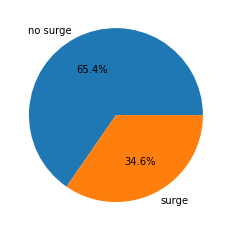

In [142]:
#Круговая диаграмма по surge
plt.pie(df_surge_pie, labels=df_surge_pie.index, autopct="%1.1f%%")

Большая часть вызовов такси (65,4%) приходится на период без надбавки за повышенный спрос.

In [143]:
#Сводная таблица: количество открытий приложения по отношению к началу сессии
df_hour = pd.pivot_table(df, index="hour", values="user_id", aggfunc="count")
df_hour.sort_values(by='hour', ascending=False)

,user_id
hour,
23,4164
22,4240
21,4304
20,4264
19,4121
18,4237
17,4128
16,4159
15,4212


<BarContainer object of 24 artists>

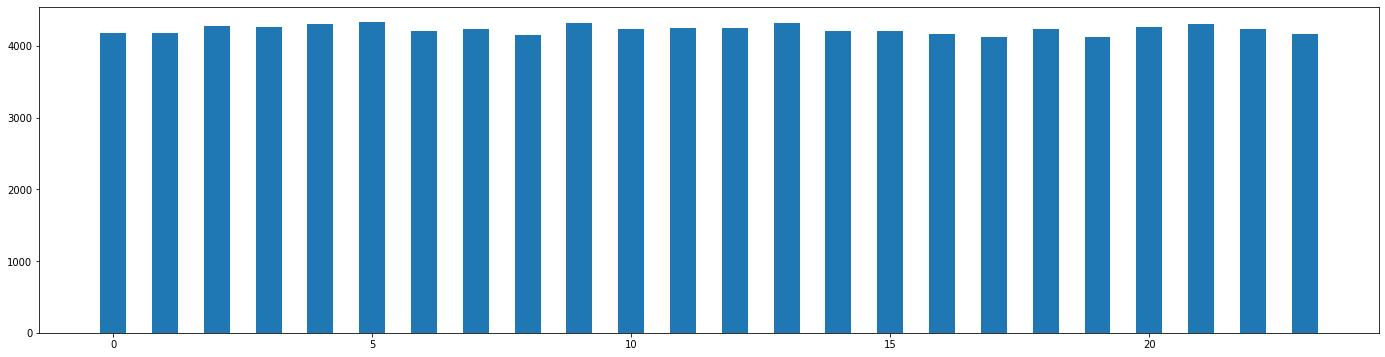

In [144]:
#Столбчатая диаграмма по количеству открытий приложения по времени начала сессии.
fig = plt.figure(figsize=(24, 6))
plt.bar(df_hour.index, height=df_hour.user_id, width=0.5)

Приблизительно равноемрное распределение открытий приложения относительно времени начала сессии.

In [145]:
df['hour'].mode()

0    5
dtype: int64

In [146]:
#Сводная таблица: количество пользователей по возратам
df_age = pd.pivot_table(df, index='age', values='user_id', aggfunc='nunique', margins=False)
df_age

,user_id
age,
18,2147
19,2033
20,1711
21,1599
22,1534
23,1340
24,1223
25,1115
26,1029


<BarContainer object of 52 artists>

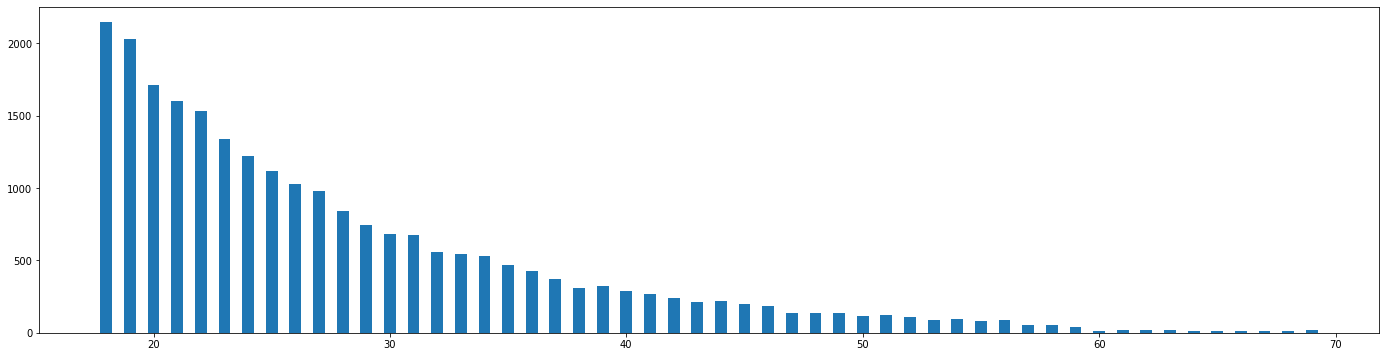

In [147]:
#Столбчатая диаграмма по количествн пользователей по возратам
fig = plt.figure(figsize=(24, 6))
plt.bar(df_age.index, height=df_age.user_id, width=0.5)

Основная аудитория - молодые люди 18-30 лет.

In [148]:
df['age'].mode()

0    18
dtype: int64

In [149]:
#Сводная таблица: центр города / не центр города и дистанции поездок
df_dist = pd.pivot_table(df, index='city_center_order', values='distance', aggfunc=['count', 'min', 'max', 'mean'], margins=False)
df_dist

,count,min,max,mean
,distance,distance,distance,distance
city_center_order,,,,
0,38340,0.010946,38.383806,5.364152
1,53091,0.025761,40.268966,5.376207


Более половины всех заказов были сделаны из центра города. При этом данные по дистанции поездки практически не отличаются.

###Информация по отменённым поездкам

In [150]:
#Кол-во отменённых поездок
df['user_cancelled'].sum()

11269

In [151]:
#DF по отменённым поездкам
df_cancelled = df[df['user_cancelled'] == 1]
df_cancelled.describe()

,Unnamed: 0,user_id,hour,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age
count,11269.000000,11269.000000,11269.000000,11269.0,11269.0,11269.0,11269.0,11269.0,11269.000000,11269.000000,11269.000000
mean,50738.019700,550824.891206,11.372438,1.0,1.0,1.0,0.0,1.0,0.500222,5.098751,26.188304
std,29127.774329,257984.931967,6.971733,0.0,0.0,0.0,0.0,0.0,0.500022,3.918564,8.218055
min,22.000000,100118.000000,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.025761,18.000000
25%,25649.000000,328222.000000,5.000000,1.0,1.0,1.0,0.0,1.0,0.000000,2.314856,20.000000
50%,51207.000000,552128.000000,11.000000,1.0,1.0,1.0,0.0,1.0,1.000000,4.062219,24.000000
75%,75864.000000,773497.000000,17.000000,1.0,1.0,1.0,0.0,1.0,1.000000,6.700610,30.000000
max,101493.000000,999878.000000,23.000000,1.0,1.0,1.0,0.0,1.0,1.000000,31.475713,69.000000


In [152]:
#Количество уникальных пользователей
df_cancelled.user_id.nunique()

9043

In [153]:
#Сводная таблица: кол-во уникальных пользователей по классу
df_order_class_cancel = pd.pivot_table(df_cancelled, index="order_class", values="user_id", aggfunc='nunique', margins=False).sort_values(by='user_id', ascending=False)
df_order_class_cancel

,user_id
order_class,
economy,5459
comfort,3758
business,986


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7fd968f806d0>,
 [Text(-0.12084070437318879, 1.0933423636567787, 'economy'),
  Text(-0.2115465677989424, -1.0794665579129756, 'comfort'),
  Text(1.0496936952021492, -0.328851252472691, 'business')],
 [Text(-0.06591311147628479, 0.5963685619946065, '53.5%'),
  Text(-0.11538903698124128, -0.5887999406798049, '36.8%'),
  Text(0.5725601973829905, -0.1793734104396496, '9.7%')])

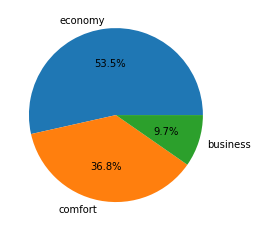

In [154]:
#Круговая диаграмма по классам пользователей
plt.pie(df_order_class_cancel, labels=df_order_class_cancel.index, autopct="%1.1f%%")

Чаще всего поездки отменяются пользователями эконом-класса (53,5%).

In [155]:
#Сводная таблица: кол-во уникальных пользователей по rfm
df_rfm_cancel = pd.pivot_table(df_cancelled, index="rfm", values="user_id", aggfunc='nunique', margins=False).sort_values(by='user_id', ascending=False)
df_rfm_cancel

,user_id
rfm,
low,4750
high,3942
medium,351


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7fd9691ec250>,
 [Text(-0.08722873464539635, 1.096535976542568, 'low'),
  Text(-0.04679899623851627, -1.0990040281778168, 'high'),
  Text(1.091832025184108, -0.13380145284102568, 'medium')],
 [Text(-0.047579309806579824, 0.5981105326595825, '52.5%'),
  Text(-0.02552672522100887, -0.5994567426424455, '43.6%'),
  Text(0.5955447410095135, -0.07298261064055946, '3.9%')])

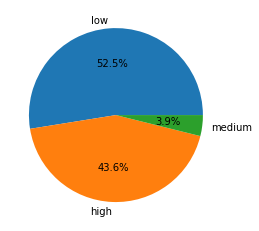

In [156]:
#Круговая диаграмма по пользователям RFM
plt.pie(df_rfm_cancel, labels=df_rfm_cancel.index, autopct="%1.1f%%")

Поездки отменяются пользователями low, high по rfm.

In [157]:
#Сводная таблица: кол-во уникальных пользователей по os
df_os_cancel = pd.pivot_table(df_cancelled, index="os", values="user_id", aggfunc='nunique', margins=False)
df_os_cancel.sort_values(by='user_id', ascending=False)

,user_id
os,
Android,6345
iOS,3601


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7fd968f19650>,
 [Text(-0.4619214267977417, 0.9983128745364045, 'Android'),
  Text(0.46192133332894214, -0.9983129177846055, 'iOS')],
 [Text(-0.2519571418896772, 0.5445342952016751, '63.8%'),
  Text(0.25195709090669566, -0.544534318791603, '36.2%')])

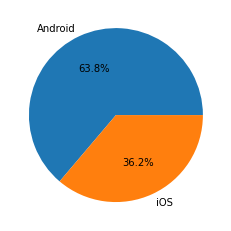

In [158]:
#Круговая диаграмма по ОС пользователей
plt.pie(df_os_cancel, labels=df_os_cancel.index, autopct="%1.1f%%")

Более половины всех отмен заказов приходится на пользователей с ОС Android (63,8%).

In [159]:
#Сводная таблица: количество заказов по отношению к началу сессии
df_hour_cancel = pd.pivot_table(df_cancelled, index="hour", values="user_id", aggfunc="count")
df_hour_cancel.sort_values(by='hour', ascending=False)

,user_id
hour,
23,537
22,504
21,425
20,378
19,366
18,472
17,464
16,501
15,478


<BarContainer object of 24 artists>

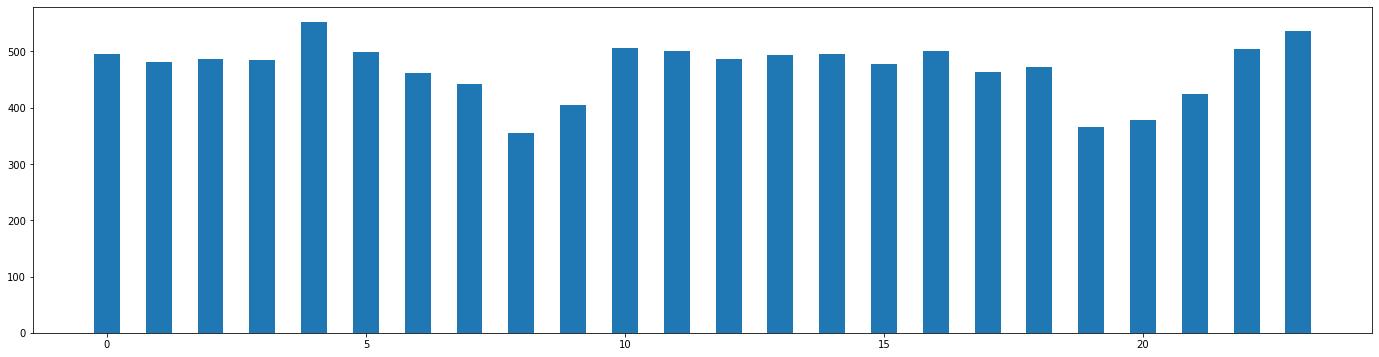

In [160]:
#Столбчатая диаграмма по количеству заказов по времени начала сессии.
fig = plt.figure(figsize=(24, 6))
plt.bar(df_hour_cancel.index, height=df_hour_cancel.user_id, width=0.5)

Меньше всего отмен заказов приходится на время дороги с/на работу (8-9 утра и 19-20 вечера). Больше всего отказов - 4 утра и 23 вечера.

# Домашнее задание: интерпретируем и визуализируем результаты
Используя тестовые данные рассчитайте 5 метрик. Для каждой метрики:
* Посчитайте среднее
* Посчитайте медиану
* Посчитайте 95-персентиль
* Визуализируйте распределение частотным графиком и “ящиком с усами”.

In [189]:
# 1. Age - создали df для анализа метрики - возраст пользователя
df_user_age=df[['user_id', 'age']].drop_duplicates()
df_user_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24224 entries, 0 to 101488
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   user_id  24224 non-null  int64
 1   age      24224 non-null  int64
dtypes: int64(2)
memory usage: 567.8 KB


In [190]:
# Средний возраст пользователей
df_user_age['age'].mean()

27.852130118890358

In [191]:
# Медиана возраста пользователей
df_user_age['age'].median()

25.0

In [192]:
# 95-пересентиль к метрике возраст пользователя
df_user_age['age'].quantile(q=0.95)

48.0

(array([10364.,  5195.,  3207.,  2104.,  1329.,   878.,   583.,   378.,
          117.,    69.]),
 array([18. , 23.1, 28.2, 33.3, 38.4, 43.5, 48.6, 53.7, 58.8, 63.9, 69. ]),
 <a list of 10 Patch objects>)

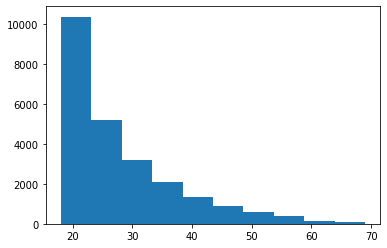

In [193]:
#Гистограмма к метрике возраст пользователя
plt.hist(df_user_age['age'])

<BarContainer object of 52 artists>

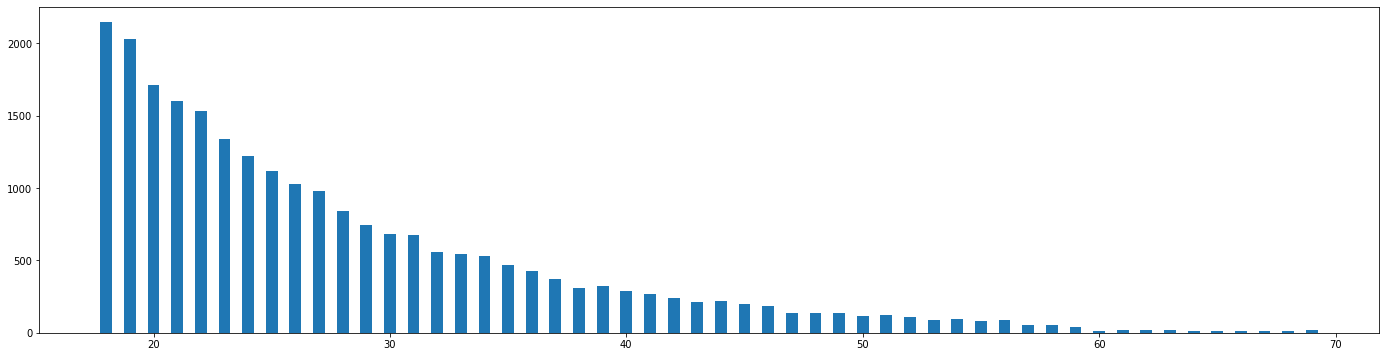

In [194]:
#Столбчатая диаграмма по количеству пользователей по возратам
#pd.pivot_table(df_user_age, index='age', values='user_id', aggfunc='count')
fig = plt.figure(figsize=(24, 6))
plt.bar(pd.pivot_table(df_user_age, index='age', values='user_id', aggfunc='count').index, height=pd.pivot_table(df_user_age, index='age', values='user_id', aggfunc='count').user_id, width=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd91356d710>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd9135751d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd91356d190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd913575c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd91357d210>],
 'means': []}

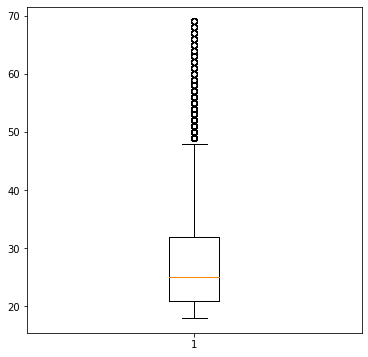

In [232]:
# Boxplot к метрике возраст пользователя
fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_user_age['age'])

In [196]:
# 2. Hour - создаём df для анализа метрики - час старта сессии с последующим заказом (далее час заказа)
df_hour_order = df[['hour', 'order_made']]
df_hour_order = df_hour_order[df_hour_order['order_made']>=1]
df_hour_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74236 entries, 0 to 101499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hour        74236 non-null  int64
 1   order_made  74236 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB


In [197]:
# Среднее значение для часа заказа
df_hour_order['hour'].mean()

11.376246026186756

In [198]:
# Медиана для часа заказа
df_hour_order['hour'].median()

11.0

In [199]:
# 95-персентиль для часа заказа
df_hour_order['hour'].quantile(q=0.95)

22.0

(array([9675., 6538., 6541., 7957., 6438., 6562., 9552., 6472., 5323.,
        9178.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

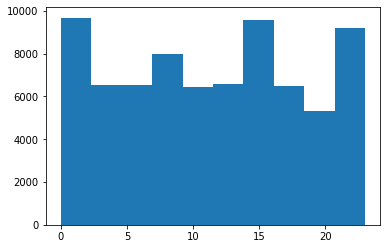

In [200]:
# Гистограмма для часа заказа
plt.hist(df_hour_order['hour'])

<BarContainer object of 24 artists>

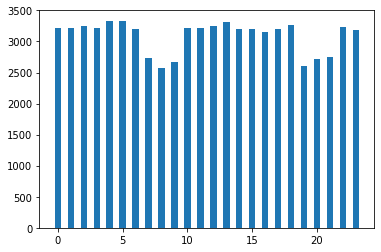

In [201]:
# Столбчатая диаграмма для часа заказа
#pd.pivot_table(df_hour_order, index='hour', values='order_made', aggfunc='count')
plt.bar(pd.pivot_table(df_hour_order, index='hour', values='order_made', aggfunc='count').index, height=pd.pivot_table(df_hour_order, index='hour', values='order_made', aggfunc='count').order_made, width=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd9136045d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd91360a090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd9135fbfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd91360ab50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9136120d0>],
 'means': []}

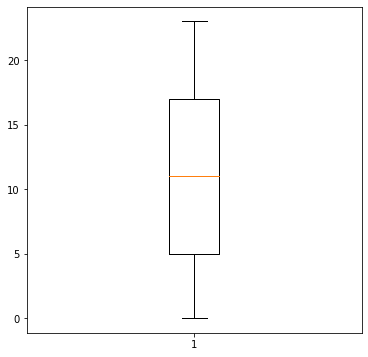

In [231]:
# Boxplot для часа заказа
fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_hour_order['hour'])

In [203]:
# 3. Distance - создаём df для анализа метрики - дистанция заказов
df_distance = df[['distance', 'order_made']]
df_distance = df_distance[df_distance['order_made']>=1]
df_distance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74236 entries, 0 to 101499
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   distance    74236 non-null  float64
 1   order_made  74236 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [204]:
# Среднее значение для метрики Дистанция
df_distance['distance'].mean()

5.367276962171588

In [205]:
# Медиана для метрики Дистанция
df_distance['distance'].median()

4.2687265259992895

In [206]:
# 95-персентиль для метрики Дистанция
df_distance['distance'].quantile(q=0.95)

13.76902444579496

(array([3.3269e+04, 2.4866e+04, 9.7160e+03, 3.9330e+03, 1.6290e+03,
        5.6300e+02, 1.8500e+02, 6.6000e+01, 6.0000e+00, 3.0000e+00]),
 array([1.09464561e-02, 3.84823243e+00, 7.68551841e+00, 1.15228044e+01,
        1.53600904e+01, 1.91973763e+01, 2.30346623e+01, 2.68719483e+01,
        3.07092343e+01, 3.45465202e+01, 3.83838062e+01]),
 <a list of 10 Patch objects>)

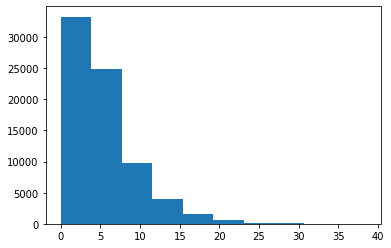

In [207]:
# Гистограмма для метрики Дистанция
plt.hist(df_distance['distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd91368b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd913691190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd91368b150>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd913691c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd9136991d0>],
 'means': []}

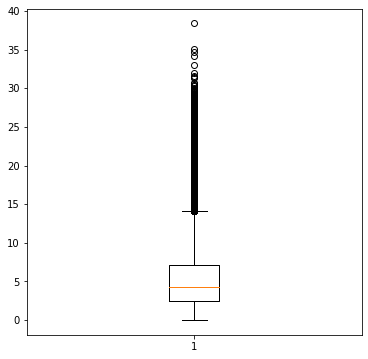

In [230]:
# Boxplot для метрики Дистанция
fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_distance['distance'])

In [209]:
# 4. City_center_order - создаём df для анализа метрики - дистанция заказов из центра города
df_centre = df[['order_made', 'city_center_order', 'distance']]
df_centre = df_centre[((df_centre['order_made']>=1) & (df_centre['city_center_order']>=1))]
df_centre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44491 entries, 1 to 101496
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_made         44491 non-null  int64  
 1   city_center_order  44491 non-null  int64  
 2   distance           44491 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [210]:
# Среднее для метрики дистанция заказов из центра города
df_centre['distance'].mean()

5.38156933168203

In [211]:
# Медиана для метрики дистанция заказов из центра города
df_centre['distance'].median()

4.300468766684748

In [212]:
# 95-персентиль для метрики дистанция заказов из центра города
df_centre['distance'].quantile(q=0.95)

13.733723588341704

(array([1.7704e+04, 1.5226e+04, 6.5910e+03, 2.8430e+03, 1.3030e+03,
        5.3600e+02, 1.8600e+02, 6.7000e+01, 2.9000e+01, 6.0000e+00]),
 array([2.57613011e-02, 3.49858501e+00, 6.97140873e+00, 1.04442324e+01,
        1.39170562e+01, 1.73898799e+01, 2.08627036e+01, 2.43355273e+01,
        2.78083510e+01, 3.12811747e+01, 3.47539984e+01]),
 <a list of 10 Patch objects>)

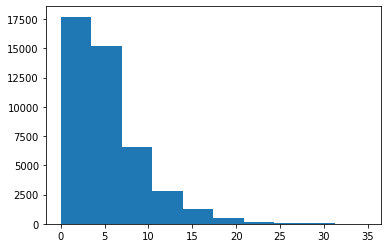

In [213]:
# Гистограмма для метрики дистанция заказов из центра города
plt.hist(df_centre['distance'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd913714fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd913718a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd913714a50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd91371f590>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd91371fad0>],
 'means': []}

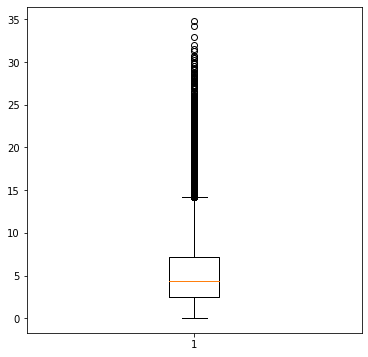

In [229]:
# Boxplot для метрики дистанция заказов из центра города
fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_centre['distance'])

In [215]:
# 5. User_cancelled - создаём df для анализа метрики - количество отмен заказов по пользователям
df_user_cancelled = df[['order_made', 'user_cancelled', 'user_id']]
df_user_cancelled = df_user_cancelled[((df_user_cancelled['order_made']>=1) & (df_user_cancelled['user_cancelled']>=1))]
df_user_cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11269 entries, 22 to 101493
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   order_made      11269 non-null  int64
 1   user_cancelled  11269 non-null  int64
 2   user_id         11269 non-null  int64
dtypes: int64(3)
memory usage: 352.2 KB


In [225]:
# Сводная таблица по количеству отменённых заказов на пользователя
df_user_cancelled_1 = pd.pivot_table(df_user_cancelled, index='user_id', values='user_cancelled', aggfunc='count')
df_user_cancelled_1.describe()

,user_cancelled
count,9043.000000
mean,1.246157
std,0.516489
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


In [217]:
# Среднее для метрики - количество отмен заказов по пользователям
df_user_cancelled_1['user_cancelled'].mean()

1.2461572487006525

In [218]:
# Медиана для метрики - количество отмен заказов по пользователям
df_user_cancelled_1['user_cancelled'].median()

1.0

In [219]:
# 95-персентиль для метрики - количество отмен заказов по пользователям
df_user_cancelled_1['user_cancelled'].quantile(q=0.95)

2.0

(array([7.143e+03, 0.000e+00, 1.610e+03, 0.000e+00, 0.000e+00, 2.590e+02,
        0.000e+00, 2.600e+01, 0.000e+00, 5.000e+00]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

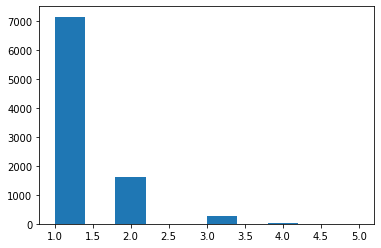

In [222]:
# Гистограмма для метрики - количество отмен заказов по пользователям
plt.hist(df_user_cancelled_1['user_cancelled'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd91379e190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd91379ec10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd913796bd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd913726710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd913726c50>],
 'means': []}

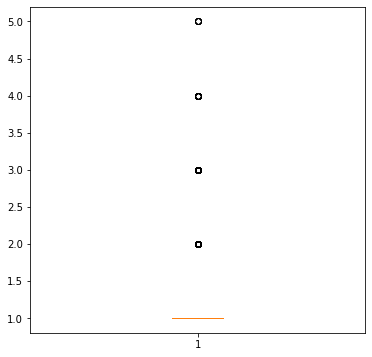

In [228]:
# Boxplot для метрики - количество отмен заказов по пользователям
fig = plt.figure(figsize=(6, 6))
plt.boxplot(df_user_cancelled_1['user_cancelled'])